<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_5_sarcasm_with_bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HeadLine Sarcasm Detection Model using Bidirectional LSTMs

We will revisit the [News Headlines Dataset for Sarcasm Detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/home) dataset and use it to train Deep Learning Model.


## Download the Dataset

First, We will download the JSON file and extract the contents into lists.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lets read data

In [2]:
import json

datastore = []
datastore_2 = []


# following codes refrence is official dataset webpage in kaggle
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)


# v2 dataset is extended of first dataset therefore we load v2 as a most complete dataset

# datastore = list(parse_data('/content/drive/MyDrive/Sarcasm/Sarcasm_Headlines_Dataset.json'))
datastore_2 = list(parse_data('/content/drive/MyDrive/Sarcasm/Sarcasm_Headlines_Dataset_v2.json'))


Lets see some data

In [55]:
datastore_2[21]

{'is_sarcastic': 1,
 'headline': 'guard in video game under strict orders to repeatedly pace same stretch of hallway',
 'article_link': 'https://www.theonion.com/guard-in-video-game-under-strict-orders-to-repeatedly-p-1819577045'}

In [4]:
# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore_2:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Split the Dataset

We will then split the lists into train and test sets.

In [5]:
len(sentences)

28619

In [6]:
training_size = 20000 # we use 8619 headlines for test

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Data preprocessing

Next, we will generate the vocabulary and padded sequences.

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

Lets chekc out dictionary

In [8]:
word_index

{'<OOV>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'man': 13,
 'trump': 14,
 'at': 15,
 'from': 16,
 'about': 17,
 'by': 18,
 'you': 19,
 'after': 20,
 'this': 21,
 'out': 22,
 'be': 23,
 'up': 24,
 'that': 25,
 'as': 26,
 'how': 27,
 'it': 28,
 'not': 29,
 'he': 30,
 'what': 31,
 'are': 32,
 'his': 33,
 'who': 34,
 'just': 35,
 'your': 36,
 'all': 37,
 'has': 38,
 'report': 39,
 'more': 40,
 'into': 41,
 'will': 42,
 'one': 43,
 'year': 44,
 'have': 45,
 'over': 46,
 'why': 47,
 'u': 48,
 'woman': 49,
 'area': 50,
 's': 51,
 'says': 52,
 'day': 53,
 'can': 54,
 'first': 55,
 'like': 56,
 'donald': 57,
 'time': 58,
 'get': 59,
 'no': 60,
 'old': 61,
 'her': 62,
 'now': 63,
 'off': 64,
 'people': 65,
 'life': 66,
 "'": 67,
 "trump's": 68,
 'house': 69,
 'obama': 70,
 'an': 71,
 'white': 72,
 'was': 73,
 'down': 74,
 'back': 75,
 'make': 76,
 'if': 77,
 'still': 78,
 'than': 79,
 '5': 80,
 'women': 81,
 'the

as we can see index 1 is for "OOV" Token

We need to do padding to create a sentences with same length.  
we can see number "0" is reserved for padding

In [9]:
# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [10]:
training_padded[0], training_sequences[0]

(array([   1,  325, 3169, 5817, 2489,    3,  655,  993,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       dtype=int32),
 [1, 325, 3169, 5817, 2489, 3, 655, 993])

We can see here we have `post` for our padding type and number `0` is reserved for padding.

## Build and Compile the Model

Here we create The architecture for our model

In [21]:
import tensorflow as tf

# Parameters
embedding_dim = 100
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.50), #- we add for avoiding overfitting
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dropout(0.50),#- we add for avoiding overfitting
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 100)          1000000   
                                                                 
 dropout_2 (Dropout)         (None, 120, 100)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                34048     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                      

Lets see weight of Embedding Layer

In [22]:
embed_layer = model_lstm.layers[0]

In [23]:
embedding_weights = embed_layer.get_weights()

In [24]:
len(embedding_weights)

1

In [25]:
embedding_weights[0].shape # we have embedded space for 10000 vocabs each vocab with 100 dimension

(10000, 100)

## Train the Model

Finding good `learning rate` by create a callback for increase leanring rate continusely at the end of epoch, for that we have two approches:
1. using `tf.keras.optimizers.schedules`
2. using `tf.keras.callbacks.LearningRateScheduler`

In [26]:
# second approch
#-----------



# first approche
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20)) #- this is increase the learning rate per epoch

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam() #- this Optimizer is very noisy becuase it calculate each record and update weights based on loss function on one record
#- epoch will end after calculate loss for each record


# Set the training parameters
model_lstm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [28]:
NUM_EPOCHS = 50

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, callbacks=[lr_schedule])

Epoch 1/50
625/625 [==============================] - 16s 25ms/step - loss: 0.6929 - accuracy: 0.5119 - lr: 1.0000e-08
Epoch 2/50
625/625 [==============================] - 9s 14ms/step - loss: 0.6931 - accuracy: 0.5088 - lr: 1.1220e-08
Epoch 3/50
625/625 [==============================] - 8s 12ms/step - loss: 0.6931 - accuracy: 0.5056 - lr: 1.2589e-08
Epoch 4/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6929 - accuracy: 0.5082 - lr: 1.4125e-08
Epoch 5/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6928 - accuracy: 0.5092 - lr: 1.5849e-08
Epoch 6/50
625/625 [==============================] - 7s 12ms/step - loss: 0.6929 - accuracy: 0.5054 - lr: 1.7783e-08
Epoch 7/50
625/625 [==============================] - 9s 14ms/step - loss: 0.6927 - accuracy: 0.5166 - lr: 1.9953e-08
Epoch 8/50
625/625 [==============================] - 8s 13ms/step - loss: 0.6930 - accuracy: 0.5073 - lr: 2.2387e-08
Epoch 9/50
625/625 [==============================] - 8

Lets visualize our work

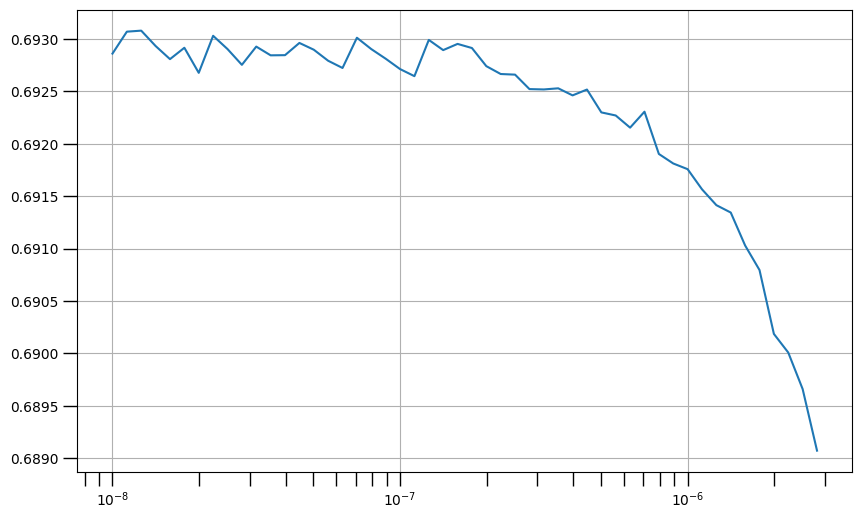

In [38]:
import matplotlib.pyplot as plt

# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(50) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history_lstm.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
# plt.axis([1e-6, 1e-5, 0, 1])

As we can see at right end of plot we have smooth decreasing in loss function, we can with a good confidence choose something little bit more that `1e-6`  

In [56]:
# clear previous session
tf.keras.backend.clear_session()


# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.50), #- we add for avoiding overfitting
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dropout(0.50),#- we add for avoiding overfitting
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-6)

# create a callback to decrease learning rate when we do not have improvement in plateu surface
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5)

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [57]:
NUM_EPOCHS = 100

# Train the model for 50 epochs
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels), callbacks=[lr_reduce])

Epoch 1/100
625/625 [==============================] - 22s 30ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6929 - val_accuracy: 0.5344 - lr: 2.0000e-06
Epoch 2/100
625/625 [==============================] - 11s 17ms/step - loss: 0.6930 - accuracy: 0.5082 - val_loss: 0.6925 - val_accuracy: 0.5544 - lr: 2.0000e-06
Epoch 3/100
625/625 [==============================] - 13s 21ms/step - loss: 0.6927 - accuracy: 0.5206 - val_loss: 0.6922 - val_accuracy: 0.5518 - lr: 2.0000e-06
Epoch 4/100
625/625 [==============================] - 11s 17ms/step - loss: 0.6925 - accuracy: 0.5246 - val_loss: 0.6919 - val_accuracy: 0.5363 - lr: 2.0000e-06
Epoch 5/100
625/625 [==============================] - 11s 18ms/step - loss: 0.6923 - accuracy: 0.5285 - val_loss: 0.6916 - val_accuracy: 0.5276 - lr: 2.0000e-06
Epoch 6/100
625/625 [==============================] - 10s 15ms/step - loss: 0.6920 - accuracy: 0.5347 - val_loss: 0.6913 - val_accuracy: 0.5254 - lr: 2.0000e-06
Epoch 7/100
625/625 [=======

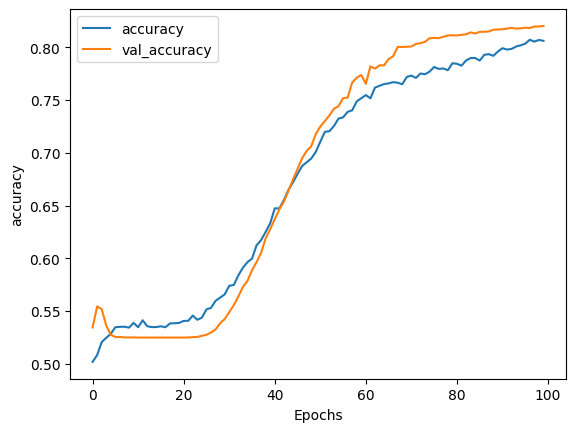

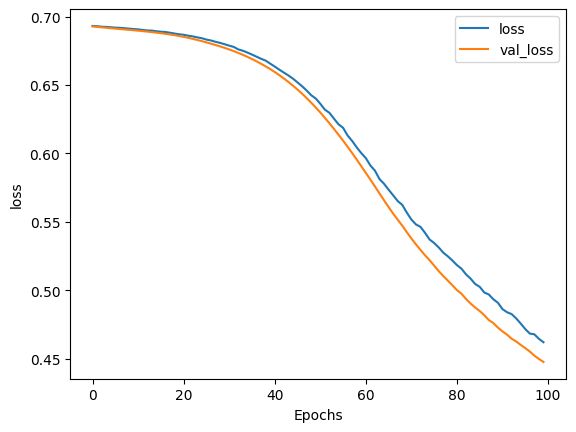

In [58]:

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

We can see our model is showing convergence without overfitting, we can train model more to get more accurate and generalize model

In following cell we want to extract weights of each words and show it on corrdinate diagram to get sense of how `Embedding` layer trained and extract meaning of each words based on labeled we had. `Sarcasm`, `Not Sarcasm`   

---

you can upload these two file on this site: https://projector.tensorflow.org/
Here you can use several techniques of dimension reduction to plot the words in 2D or 3D diagram

In [50]:
import io

open_vm = io.open('vec.tsv', 'w')
open_me = io.open('meta.tsv', 'w')

embd_layer = model_lstm.layers[0]
embd_weights = embd_layer.get_weights()
print('Embedded layer weights shape: ', embd_weights[0].shape)

id_word = tokenizer.index_word
for i in range(1, vocab_size): #- 0 index is for padding index in sequence so we do not want its weights in embedding layer
  # Get the word associated at the current index
  word_name = id_word[i]

  # Get the embedding weights associated with the current index
  word_embedding = embd_weights[0][i]
  # Write the word name
  open_me.write(word_name + "\n")

  # Write the word embedding
  open_vm.write('\t'.join([str(x) for x in word_embedding]) + "\n")


open_vm.close()
open_me.close()

Embedded layer weights shape:  (10000, 100)


In [51]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vec.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Author  
[Mrpintime](https://github.com/mrpintime/)